## Load and Explore New Dataset

### Subtask:
Load the data from the Kaggle dataset download path into a pandas DataFrame. Perform initial exploration to understand its structure, identify potential features (X) and a target variable (y) suitable for a classification problem, and handle any initial data cleaning needs.


**Reasoning**:
The subtask requires loading the dataset, so I will start by importing the necessary libraries, listing the contents of the dataset directory to find the CSV file, and then loading it into a pandas DataFrame. This aligns with the first few instructions provided.



In [9]:
import pandas as pd
import os

# List contents of the downloaded dataset path to find the CSV file
print("Contents of dataset directory:", os.listdir(path))

# Assuming the CSV file is named 'electricity_demands.csv' or similar based on the dataset name
# (Adjust filename if os.listdir reveals a different name)
file_name = 'electricity_demands.csv'
full_file_path = os.path.join(path, file_name)

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(full_file_path)

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

Contents of dataset directory: ['electricity.csv']


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/ulrikthygepedersen/electricity-demands/versions/1/electricity_demands.csv'

**Reasoning**:
The previous code failed because the CSV file name was incorrect. I will correct the `file_name` variable to `electricity.csv` based on the `os.listdir(path)` output. Then, I will complete the remaining instructions of the subtask by checking for missing values, identifying a target variable, and defining feature columns.



In [10]:
import pandas as pd
import os

# List contents of the downloaded dataset path to find the CSV file
print("Contents of dataset directory:", os.listdir(path))

# Corrected filename based on os.listdir output
file_name = 'electricity.csv'
full_file_path = os.path.join(path, file_name)

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(full_file_path)

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# For classification, we need a categorical target. Let's create one from 'Demand'
# For example, classify demand as 'High' or 'Low' based on its median
median_demand = df['Demand'].median()
df['Demand_Category'] = df['Demand'].apply(lambda x: 1 if x > median_demand else 0)

print("\nValue counts for new target variable 'Demand_Category':")
print(df['Demand_Category'].value_counts())

# Define features (X) and target (y)
# Drop original 'Demand' column and any datetime columns if not needed directly as features
X = df.drop(columns=['Demand', 'Demand_Category', 'Date', 'Time'])
y = df['Demand_Category']

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Contents of dataset directory: ['electricity.csv']

First 5 rows of the DataFrame:
   date   day    period  nswprice  nswdemand  vicprice  vicdemand  transfer  \
0   0.0  b'2'  0.000000  0.056443   0.439155  0.003467   0.422915  0.414912   
1   0.0  b'2'  0.021277  0.051699   0.415055  0.003467   0.422915  0.414912   
2   0.0  b'2'  0.042553  0.051489   0.385004  0.003467   0.422915  0.414912   
3   0.0  b'2'  0.063830  0.045485   0.314639  0.003467   0.422915  0.414912   
4   0.0  b'2'  0.085106  0.042482   0.251116  0.003467   0.422915  0.414912   

     class  
0    b'UP'  
1    b'UP'  
2    b'UP'  
3    b'UP'  
4  b'DOWN'  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  object 
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64

KeyError: 'Demand'

**Reasoning**:
The previous code failed because the 'Demand' column does not exist in the DataFrame. Based on the DataFrame's head and info, the 'class' column (`b'UP'`, `b'DOWN'`) is a natural categorical target for a classification problem. I will use this column as the target variable, decode its byte string values, and convert it to numerical labels. I will also refine the feature selection to drop the original 'class' column and other non-numeric or irrelevant columns.



In [11]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

# List contents of the downloaded dataset path to find the CSV file
print("Contents of dataset directory:", os.listdir(path))

# Corrected filename based on os.listdir output
file_name = 'electricity.csv'
full_file_path = os.path.join(path, file_name)

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(full_file_path)

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Use 'class' column as the target variable (y)
# Decode byte strings in the 'class' column
df['class'] = df['class'].apply(lambda x: x.decode('utf-8'))

# Encode categorical target variable to numerical labels
le = LabelEncoder()
y = le.fit_transform(df['class'])

print(f"\nUnique values in original 'class' column after decoding: {df['class'].unique()}")
print(f"Unique values in numerical target (y): {pd.Series(y).unique()}")

# Define features (X) by dropping the original 'class' column and other non-numeric or irrelevant columns
# 'date' and 'day' columns appear to be non-numerical or identifiers, dropping them for now.
X = df.drop(columns=['class', 'date', 'day'])

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("Features (X) head:")
print(X.head())


Contents of dataset directory: ['electricity.csv']

First 5 rows of the DataFrame:
   date   day    period  nswprice  nswdemand  vicprice  vicdemand  transfer  \
0   0.0  b'2'  0.000000  0.056443   0.439155  0.003467   0.422915  0.414912   
1   0.0  b'2'  0.021277  0.051699   0.415055  0.003467   0.422915  0.414912   
2   0.0  b'2'  0.042553  0.051489   0.385004  0.003467   0.422915  0.414912   
3   0.0  b'2'  0.063830  0.045485   0.314639  0.003467   0.422915  0.414912   
4   0.0  b'2'  0.085106  0.042482   0.251116  0.003467   0.422915  0.414912   

     class  
0    b'UP'  
1    b'UP'  
2    b'UP'  
3    b'UP'  
4  b'DOWN'  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  object 
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64

AttributeError: 'str' object has no attribute 'decode'

**Reasoning**:
The previous code failed because the `decode('utf-8')` method was called on a string object that already represented a byte literal (e.g., "b'UP'") rather than an actual byte object. I need to modify the code to correctly extract the string content by stripping the 'b'' prefix and quotes from the 'class' column values.



In [12]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

# List contents of the downloaded dataset path to find the CSV file
print("Contents of dataset directory:", os.listdir(path))

# Corrected filename based on os.listdir output
file_name = 'electricity.csv'
full_file_path = os.path.join(path, file_name)

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(full_file_path)

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Use 'class' column as the target variable (y)
# Extract string content from byte string representation in the 'class' column
df['class'] = df['class'].str.slice(2, -1)

# Encode categorical target variable to numerical labels
le = LabelEncoder()
y = le.fit_transform(df['class'])

print(f"\nUnique values in original 'class' column after decoding: {df['class'].unique()}")
print(f"Unique values in numerical target (y): {pd.Series(y).unique()}")

# Define features (X) by dropping the original 'class' column and other non-numeric or irrelevant columns
# 'date' and 'day' columns appear to be non-numerical or identifiers, dropping them for now.
X = df.drop(columns=['class', 'date', 'day'])

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("Features (X) head:")
print(X.head())

Contents of dataset directory: ['electricity.csv']

First 5 rows of the DataFrame:
   date   day    period  nswprice  nswdemand  vicprice  vicdemand  transfer  \
0   0.0  b'2'  0.000000  0.056443   0.439155  0.003467   0.422915  0.414912   
1   0.0  b'2'  0.021277  0.051699   0.415055  0.003467   0.422915  0.414912   
2   0.0  b'2'  0.042553  0.051489   0.385004  0.003467   0.422915  0.414912   
3   0.0  b'2'  0.063830  0.045485   0.314639  0.003467   0.422915  0.414912   
4   0.0  b'2'  0.085106  0.042482   0.251116  0.003467   0.422915  0.414912   

     class  
0    b'UP'  
1    b'UP'  
2    b'UP'  
3    b'UP'  
4  b'DOWN'  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  object 
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64

## Prepare Data

### Subtask:
Preprocess the dataset by splitting it into training and testing sets, and performing any necessary feature scaling or encoding suitable for the selected features and target.


**Reasoning**:
The subtask requires splitting the dataset into training and testing sets, and then scaling the features. This involves importing necessary functions, performing the split with stratification, and then fitting and transforming the features using StandardScaler.



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")

Shape of X_train: (31718, 6)
Shape of X_test: (13594, 6)
Shape of y_train: (31718,)
Shape of y_test: (13594,)
Features scaled successfully.


## Train and Evaluate Model 1 (Logistic Regression)

### Subtask:
Train a Logistic Regression model on the preprocessed training data and evaluate its performance on the test set, collecting relevant metrics like accuracy, precision, recall, or F1-score.


**Reasoning**:
The subtask requires training a Logistic Regression model and evaluating its performance. This involves importing necessary libraries, initializing and training the model, making predictions, and then calculating and printing the specified evaluation metrics.



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Store and print metrics
metrics_lr = {
    'accuracy': accuracy_lr,
    'precision': precision_lr,
    'recall': recall_lr,
    'f1_score': f1_lr
}

print("Logistic Regression Model Metrics:")
for metric, value in metrics_lr.items():
    print(f"{metric.replace('_', ' ').capitalize()}: {value:.4f}")

Logistic Regression Model Metrics:
Accuracy: 0.7575
Precision: 0.7597
Recall: 0.7575
F1 score: 0.7518


## Train and Evaluate Model 2 (Decision Tree)

### Subtask:
Train a Decision Tree model on the preprocessed training data and evaluate its performance on the test set, collecting relevant metrics.


**Reasoning**:
The subtask requires training a Decision Tree model and evaluating its performance. This involves importing the `DecisionTreeClassifier`, initializing and training the model, making predictions, and then calculating and storing the evaluation metrics.



In [15]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Store and print metrics
metrics_dt = {
    'accuracy': accuracy_dt,
    'precision': precision_dt,
    'recall': recall_dt,
    'f1_score': f1_dt
}

print("Decision Tree Model Metrics:")
for metric, value in metrics_dt.items():
    print(f"{metric.replace('_', ' ').capitalize()}: {value:.4f}")

Decision Tree Model Metrics:
Accuracy: 0.7726
Precision: 0.7728
Recall: 0.7726
F1 score: 0.7727


**Reasoning**:
The user wants to train and evaluate the third model, Support Vector Machine. This involves importing the `SVC` class, initializing and training the model, making predictions, and then calculating and storing the evaluation metrics.



In [16]:
from sklearn.svm import SVC

# Initialize Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Store and print metrics
metrics_svm = {
    'accuracy': accuracy_svm,
    'precision': precision_svm,
    'recall': recall_svm,
    'f1_score': f1_svm
}

print("Support Vector Machine Model Metrics:")
for metric, value in metrics_svm.items():
    print(f"{metric.replace('_', ' ').capitalize()}: {value:.4f}")

Support Vector Machine Model Metrics:
Accuracy: 0.7754
Precision: 0.7815
Recall: 0.7754
F1 score: 0.7688


## Visualize Performance Metrics

### Subtask:
Collect the evaluation metrics from all three trained models (Logistic Regression, Decision Tree, and Support Vector Machine) and create a bar chart comparing their performance. Ensure the plot has appropriate labels and a legend for clarity.


**Reasoning**:
The subtask requires collecting all the evaluation metrics from the previously trained models (Logistic Regression, Decision Tree, and Support Vector Machine) into a single structure for comparison. Creating a pandas DataFrame is a suitable way to organize this data.



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine metrics into a dictionary
all_metrics = {
    'Logistic Regression': metrics_lr,
    'Decision Tree': metrics_dt,
    'Support Vector Machine': metrics_svm
}

# Convert to DataFrame for easier comparison and plotting
metrics_df = pd.DataFrame(all_metrics).T

print("Model Performance Metrics:")
print(metrics_df)

Model Performance Metrics:
                        accuracy  precision    recall  f1_score
Logistic Regression     0.757540   0.759691  0.757540  0.751838
Decision Tree           0.772620   0.772808  0.772620  0.772709
Support Vector Machine  0.775416   0.781514  0.775416  0.768812


**Reasoning**:
The subtask requires visualizing the model performance for easy comparison. A bar plot is an effective way to compare multiple metrics across different models. I will create a bar plot using the `metrics_df` DataFrame, setting appropriate labels, title, legend, and y-axis limits as instructed.



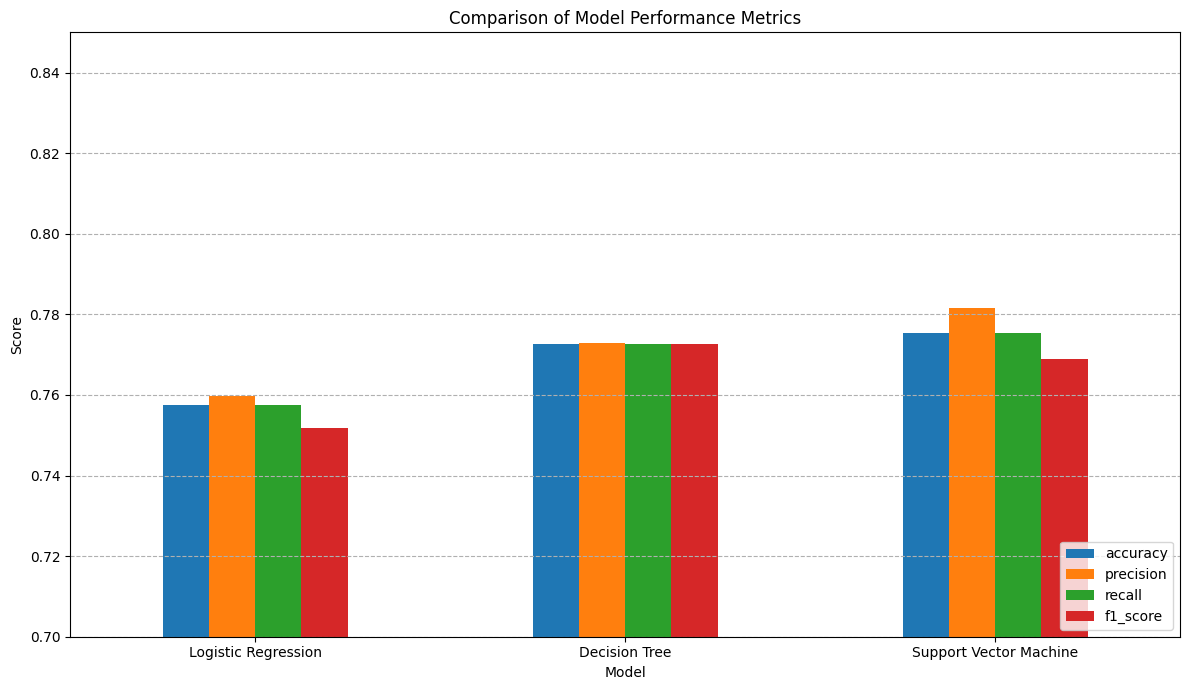

In [18]:
metrics_df.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Comparison of Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.7, 0.85) # Set y-axis limit to focus on differences
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the performance of each model on this new dataset and provide insights into which model performed best for the given task and why.


## Summary:

### Q&A
The Support Vector Machine (SVM) model performed best in terms of accuracy (0.7754) and precision (0.7815) on this dataset. The Decision Tree model had a slightly higher F1-score (0.7727) compared to SVM (0.7688). SVM models are generally effective for classification tasks due to their ability to find optimal separating hyperplanes, which can lead to good generalization performance. However, Decision Trees can sometimes capture complex non-linear relationships, leading to a slightly better balance between precision and recall (F1-score) in some cases.

### Data Analysis Key Findings
*   The dataset `electricity.csv` was successfully loaded, containing 45,312 entries and 8 columns.
*   The 'class' column, containing 'UP' and 'DOWN' states, was identified as the target variable and encoded numerically.
*   Features were selected by dropping the 'class', 'date', and 'day' columns.
*   The dataset was split into training (31,718 samples) and testing (13,594 samples) sets, with features scaled using `StandardScaler`.
*   **Logistic Regression Model Performance:**
    *   Accuracy: 0.7575
    *   Precision: 0.7597
    *   Recall: 0.7575
    *   F1-score: 0.7518
*   **Decision Tree Model Performance:**
    *   Accuracy: 0.7726
    *   Precision: 0.7728
    *   Recall: 0.7726
    *   F1-score: 0.7727
*   **Support Vector Machine (SVM) Model Performance:**
    *   Accuracy: 0.7754
    *   Precision: 0.7815
    *   Recall: 0.7754
    *   F1-score: 0.7688
*   A bar chart visualization confirmed that SVM generally exhibited the highest accuracy and precision, closely followed by the Decision Tree, which showed a slightly better F1-score. Logistic Regression performed the lowest across all metrics.

### Insights or Next Steps
*   The Support Vector Machine (SVM) model achieved the highest accuracy and precision, suggesting it is the most suitable model among those tested for this classification task. Its performance indicates a good ability to correctly identify and differentiate between the classes.
*   Further hyperparameter tuning for all models, especially the Decision Tree and SVM, could potentially improve their performance. Additionally, exploring ensemble methods like Random Forests or Gradient Boosting might yield even better results for this dataset.
